In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True) ##Comment Force Remount when running for the first time
data_link = 'Colab data files/'
base_link = '/content/drive/My Drive/'
exec(open(base_link+"Colab Notebooks/Modules/IronMan.py").read())

Mounted at /content/drive

*******************************************************************************
JARVIS V1.0   AUTHOR: CHETAN CHAUHAN
Following program is a series of useful tools for Predictive Modelling
Initiate the class object by passing in the final modelling dataset as shown
Ensure that the dependant variable is binary 0 or 1
*******************************************************************************

model = Jarvis(dataframe,dep_var)
test  = Utils()




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  from ipykernel import kernelapp as app


In [0]:
DF = pd.read_csv(r"https://raw.githubusercontent.com/Carl-Lejerskar/HMEQ/master/hmeq.csv")
r,c = DF.shape
print("Rows :",r,"Columns :",c)
print("")
DF.head(3)

Rows : 5960 Columns : 13



,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN


In [0]:
data = Jarvis(DF,'BAD')

Total Records : 5960
Event Rate    : 0.1995


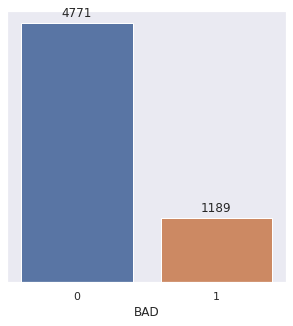

In [0]:
data.event_rate_plot()

,Descript,Stats
,Distinct Values,4693
,Missing Rate,21.26 %
,Min Value,0.52
,Max Value,203.31
,Median Value,34.82

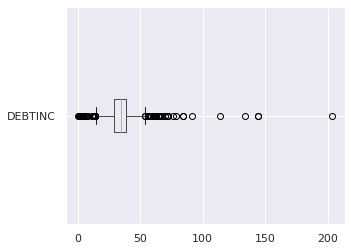
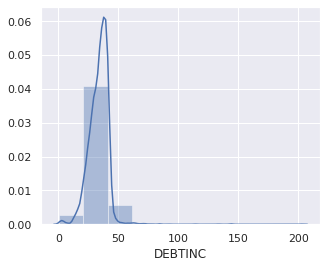

In [0]:
data.univariate_analysis('DEBTINC',num_as_cat=False)

,LABEL,VALUES,nobs,%obs
,BIN0,[0.0-84.55],566,9.496644
,BIN1,[84.58-105.77],565,9.479866
,BIN2,[105.77-122.82],565,9.479866
,BIN3,[122.83-145.1],565,9.479866
,BIN4,[145.1-173.47],566,9.496644
,BIN5,[173.49-193.08],564,9.463087
,BIN6,[193.12-215.61],565,9.479866
,BIN7,[215.75-247.04],565,9.479866
,BIN8,[247.1-295.67],565,9.479866
,BIN9,[295.72-1168.23],566,9.496644

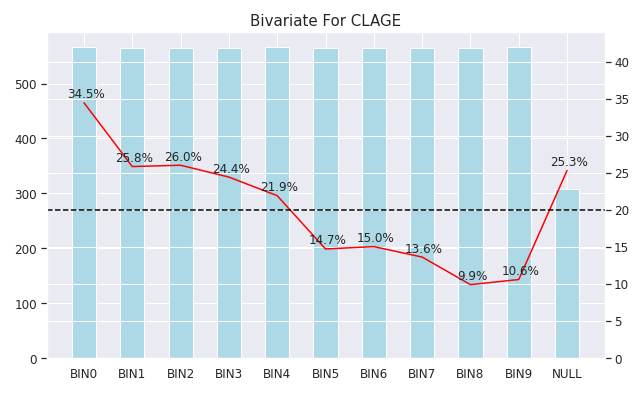

In [0]:
data.bivariate_plot('CLAGE',sort_by='default')

In [0]:
DF.head(4)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data.bivariate_analysis('DEBTINC')

,variable,category,nobs,events,non_events,event_rate,event_pct
0,DEBTINC,NULL,1267,786,481,62.04,66.11
1,DEBTINC,BIN0_[0.52-23.77],470,35,435,7.45,2.94
2,DEBTINC,BIN1_[23.8-27.62],469,20,449,4.26,1.68
3,DEBTINC,BIN2_[27.62-30.31],469,20,449,4.26,1.68
4,DEBTINC,BIN3_[30.32-32.85],469,31,438,6.61,2.61
5,DEBTINC,BIN4_[32.86-34.82],470,28,442,5.96,2.35
6,DEBTINC,BIN5_[34.82-36.59],469,38,431,8.10,3.20
7,DEBTINC,BIN6_[36.59-38.22],469,34,435,7.25,2.86
8,DEBTINC,BIN7_[38.23-39.85],469,27,442,5.76,2.27
9,DEBTINC,BIN8_[39.85-41.44],469,38,431,8.10,3.20


In [0]:
data.feature_importance(plot=False)
##CHECK FOR THIS ERROR

,var,feat_imp,imp_std,excess
0,DEBTINC,0.82877,0.02007,0.32877
1,DELINQ,0.66476,0.02047,0.16476
2,CLAGE,0.62222,0.01606,0.12222
3,DEROG,0.61923,0.00635,0.11923
4,LOAN,0.61543,0.01572,0.11543
5,VALUE,0.61051,0.00999,0.11051
6,NINQ,0.59822,0.00851,0.09822
7,YOJ,0.58390,0.01528,0.08390
8,CLNO,0.57106,0.01902,0.07106
9,JOB,0.55933,0.01392,0.05933


In [0]:
data.information_value()

,variable,info_value
0,DEBTINC,1.877152
1,DELINQ,0.621145
2,VALUE,0.470748
3,DEROG,0.453518
4,CLAGE,0.230641
5,NINQ,0.228890
6,LOAN,0.160156
7,JOB,0.123731
8,YOJ,0.083534
9,CLNO,0.079104


In [0]:
"""
** Imputation Strategy **
For OBJECT   : 1) We will impute with Mode Value since MR<10%, if higher, create new category
For NUMERICS : 1) Impute using -9999 (Extreme Value Imputation) for anything with MR>8%  
               2) For everything else, will impute using Median values
"""
edd_df = data.edd()

##OBJECT
var_list = edd_df[edd_df['data_type']=='object']['var'].tolist()
print(var_list)
for var in var_list:
  DF[var].fillna(DF[var].mode()[0],inplace=True)

##NUMERICS: Extreme Value Imputation 
var_list = edd_df[(edd_df['missing_rate']>=8)&(edd_df['data_type']!='object')]['var'].tolist()
print(var_list)
for var in var_list:
  DF[var].fillna(-9999,inplace=True)

##NUMERICS: Median Imputation 
var_list = edd_df[(edd_df['missing_rate']<8)&(edd_df['data_type']!='object')]['var'].tolist()
print(var_list)
for var in var_list:
  DF[var].fillna(DF[var].median(),inplace=True)

##CREATING DUMMIES USING APPLY LAMBDA
DF['REASON_DEBTCON_IND'] = DF['REASON'].apply(lambda x: 1 if x=='DebtCon' else 0)
DF['REASON_HOMEIMP_IND'] = DF['REASON'].apply(lambda x: 1 if x=='HomeImp' else 0)
DF['JOB_OTHER']          = DF['JOB'].apply(lambda x: 1 if x=='Other'   else 0)
DF['JOB_PROF']           = DF['JOB'].apply(lambda x: 1 if x=='ProfExe' else 0) 
DF['JOB_OFFICE']         = DF['JOB'].apply(lambda x: 1 if x=='Office'  else 0)
DF['JOB_MGR_SELF_SALES'] = DF['JOB'].apply(lambda x: 1 if x in ['Mgr','Self','Sales'] else 0)
DF.drop(['REASON','JOB'],axis=1,inplace=True)

DF.head(3)

['JOB', 'REASON']
[]
['DEBTINC', 'DEROG', 'DELINQ', 'MORTDUE', 'YOJ', 'NINQ', 'CLAGE', 'CLNO', 'VALUE', 'BAD', 'LOAN']


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DEBTCON_IND,REASON_HOMEIMP_IND,JOB_OTHER,JOB_PROF,JOB_OFFICE,JOB_MGR_SELF_SALES
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,0,1,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262,0,1,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,0,1,1,0,0,0


In [0]:
"""STEP 02: Basic Model Training """
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 

In [0]:
models = {'DTM':DecisionTreeClassifier(),
          'GBM':GradientBoostingClassifier(),
          'RFM':RandomForestClassifier()}
feats = [x for x in list(DF.columns) if x not in ['BAD']]
data2 = Jarvis(DF,'BAD')

In [0]:
data2.model_benchmarking(models,feats)

MODEL: DTM| TRAIN LEN: 4768| TEST LEN: 1192| TRAIN ER: 19.95%| TEST ER: 19.97%| TRAIN AUC:1.00000| TEST AUC:0.78370
MODEL: DTM| TRAIN LEN: 4768| TEST LEN: 1192| TRAIN ER: 19.95%| TEST ER: 19.97%| TRAIN AUC:1.00000| TEST AUC:0.77107
MODEL: DTM| TRAIN LEN: 4768| TEST LEN: 1192| TRAIN ER: 19.95%| TEST ER: 19.97%| TRAIN AUC:1.00000| TEST AUC:0.78474
MODEL: DTM| TRAIN LEN: 4768| TEST LEN: 1192| TRAIN ER: 19.95%| TEST ER: 19.97%| TRAIN AUC:1.00000| TEST AUC:0.80050
MODEL: DTM| TRAIN LEN: 4768| TEST LEN: 1192| TRAIN ER: 19.97%| TEST ER: 19.88%| TRAIN AUC:1.00000| TEST AUC:0.79611
MODEL: GBM| TRAIN LEN: 4768| TEST LEN: 1192| TRAIN ER: 19.95%| TEST ER: 19.97%| TRAIN AUC:0.95545| TEST AUC:0.92866
MODEL: GBM| TRAIN LEN: 4768| TEST LEN: 1192| TRAIN ER: 19.95%| TEST ER: 19.97%| TRAIN AUC:0.95261| TEST AUC:0.93932
MODEL: GBM| TRAIN LEN: 4768| TEST LEN: 1192| TRAIN ER: 19.95%| TEST ER: 19.97%| TRAIN AUC:0.95683| TEST AUC:0.93819
MODEL: GBM| TRAIN LEN: 4768| TEST LEN: 1192| TRAIN ER: 19.95%| TEST ER: 

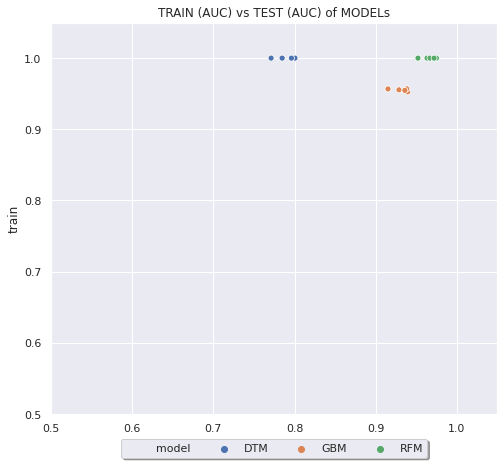

In [0]:
data2.model_benchmark_plot()

In [0]:
data.predictive_missing_value(plot=False)

,var,missing_rt,gini
0,DEBTINC,0.21,0.77625
1,VALUE,0.02,0.70147
2,DEROG,0.12,0.68219
3,JOB,0.05,0.68195
4,DELINQ,0.10,0.68183
5,YOJ,0.09,0.68162
6,NINQ,0.09,0.68112
7,CLAGE,0.05,0.68092
8,CLNO,0.04,0.68072
9,MORTDUE,0.09,0.68061


In [0]:
test = Utils()

 REPOSITORY
            1. confusion_matrix_report
            2. print_model_feature_importance
            3. cheat_sheet
                A. 'basic_model'
                B. 'grid_search'
                C. 'tree_params' 


In [0]:
test.cheat_sheet('basic_model')


            ********************************
            BASIC MODEL CREATION CHEAT SHEET
            ********************************

            from sklearn.model_selection import train_test_split
            from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, XGBoostClassifier
            from sklearn.tree import DecisionTreeClassifier

            model = GradientBoostingClassifier()

            X = DF[feature_list]
            y = DF['BAD'] #DV SERIES FOR STRATIFY

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=713, stratify=y)

            model.fit(X_train,y_train)

            pred_test  = list(model.predict_proba(X_test)[:,1])
            pred_train = list(model.predict_proba(X_train)[:,1])


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

model = RandomForestClassifier()

feature_list = [x for x in list(DF.columns) if x not in ['BAD']]

X = DF[feature_list]
y = DF['BAD'] #DV SERIES FOR STRATIFY

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=713, stratify=y)

model.fit(X_train,y_train)

pred_test  = list(model.predict_proba(X_test)[:,1])
pred_train = list(model.predict_proba(X_train)[:,1])

In [0]:
data.model_evaluation_report(y_test.tolist(),{'RFM':pred_test})

  variable          category  nobs  events  non_events  event_rate  event_pct  \
0  PRED     BIN0_[0.0-0.0]    199   1       198         0.50        0.25        
1  PRED     BIN1_[0.0-0.01]   198   1       197         0.51        0.25        
2  PRED     BIN2_[0.01-0.02]  199   0       199         0.00        0.00        
3  PRED     BIN3_[0.02-0.03]  198   2       196         1.01        0.51        
4  PRED     BIN4_[0.03-0.05]  199   1       198         0.50        0.25        
5  PRED     BIN5_[0.05-0.08]  198   3       195         1.52        0.76        
6  PRED     BIN6_[0.08-0.17]  198   16      182         8.08        4.04        
7  PRED     BIN7_[0.17-0.35]  199   51      148         25.63       12.88       
8  PRED     BIN8_[0.35-0.63]  198   133     65          67.17       33.59       
9  PRED     BIN9_[0.63-0.98]  199   188     11          94.47       47.47       

    event_%  non_event_%  cum_event_%  cum_non_event_%      diff  
0  0.002525  0.124607     0.002525     0.

,Model,KS,AUC,GINI
0,RFM,79.842,0.963295,0.92659


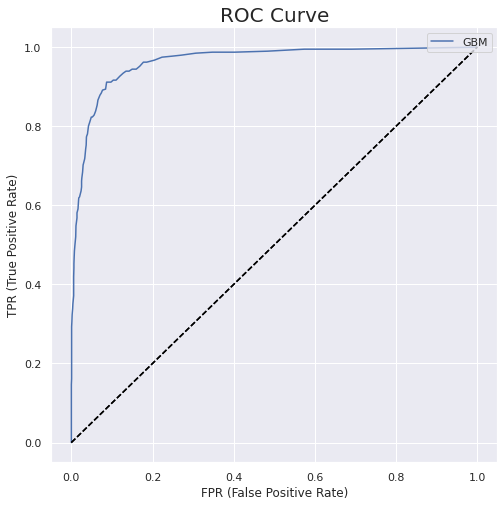

In [0]:
data.model_performance_plot('ROC_CURVE',y_test.tolist(),{'GBM':pred_test})

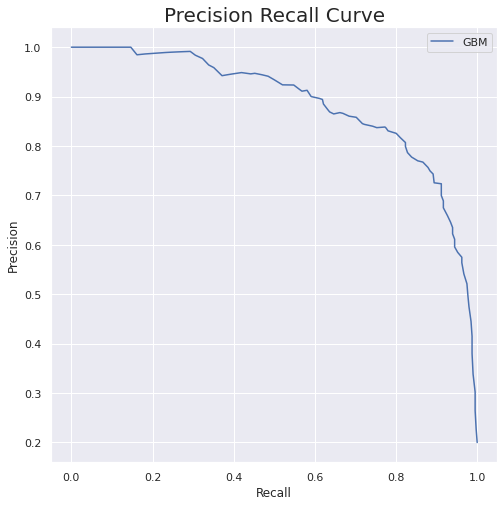

In [0]:
data.model_performance_plot('PR_CURVE',y_test.tolist(),{'GBM':pred_test})

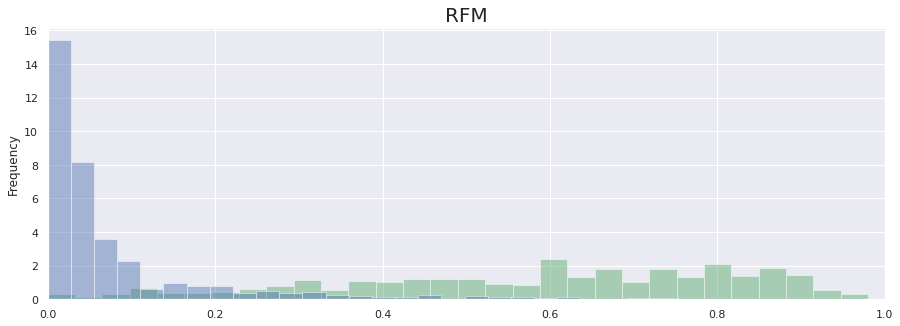

In [0]:
data.model_performance_plot('SEPARATION_CURVE',y_test.tolist(),{'RFM':pred_test})

In [0]:
test = Utils()
test.confusion_matrix(y_test.tolist(),pred_test)

 REPOSITORY
            1. confusion_matrix_report
            2. print_model_feature_importance
            3. cheat_sheet
                A. 'basic_model'
                B. 'grid_search'
                C. 'tree_params' 


interactive(children=(Dropdown(description='threshold', index=49, options=(0.01, 0.02, 0.03, 0.04, 0.05, 0.06,…

<function __main__.Utils.confusion_matrix.<locals>.con_mat>